<img src="netflix.jpg">

# Importing Libraries

In [1]:
import numpy as np
import pandas as pd

In [2]:
dataset=pd.read_csv(r"C:\Users\Raj\Desktop\NF Dataset\Machine-Learning\combined_data_1.txt",names = ['Cust_Id', 'Rating'])

In [3]:
dataset.shape

(24058263, 2)

In [172]:
df=dataset
df.shape

(24058263, 2)

In [173]:
arr=np.array(df.iloc[:,1])
x=np.argwhere(np.isnan(arr))
movie_np = []
movie_id = 1

for i in range(len(x)-1):
    temp = np.full((1,int(x[i+1]-x[i]-1)), movie_id)
    movie_np = np.append(movie_np, temp)
    movie_id+=1
    
last_record = np.full((1,len(df) - int(x[i+1]) - 1),movie_id)
movie_np = np.append(movie_np, last_record)
print(movie_np)
print('Movie numpy: {}'.format(movie_np))
print('Length: {}'.format(len(movie_np)))

[1.000e+00 1.000e+00 1.000e+00 ... 4.499e+03 4.499e+03 4.499e+03]
Movie numpy: [1.000e+00 1.000e+00 1.000e+00 ... 4.499e+03 4.499e+03 4.499e+03]
Length: 24053764


In [174]:
df = df[pd.notnull(df['Rating'])]

In [175]:
df['Movie_Id'] = movie_np.astype(int)

C:\Users\Raj\Anaconda3_1\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [176]:
df['Cust_Id'] = df['Cust_Id'].astype(int)
print('-Dataset examples-')
print(df.head())
print(df.shape)

-Dataset examples-
   Cust_Id  Rating  Movie_Id
1  1488844     3.0         1
2   822109     5.0         1
3   885013     4.0         1
4    30878     4.0         1
5   823519     3.0         1
(24053764, 3)


C:\Users\Raj\Anaconda3_1\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [177]:
import matplotlib.pyplot as pyp
import seaborn as sns
sns.set_style('white')
%matplotlib inline

In [178]:
ratings = pd.DataFrame(df.groupby('Movie_Id')['Rating'].mean())
ratings.head()

,Rating
Movie_Id,
1,3.749543
2,3.558621
3,3.641153
4,2.739437
5,3.919298


In [179]:
ratings['num of ratings'] = pd.DataFrame(df.groupby('Movie_Id')['Rating'].count())
ratings.head()

,Rating,num of ratings
Movie_Id,,
1,3.749543,547
2,3.558621,145
3,3.641153,2012
4,2.739437,142
5,3.919298,1140


In [180]:
ratings.sort_values('num of ratings',ascending=False).head(10)

,Rating,num of ratings
Movie_Id,,
1905,4.153908,193941
2152,3.425322,162597
3860,3.434517,160454
4432,3.755364,156183
571,3.962585,154832
3938,4.144543,153996
4306,4.325245,151292
2452,4.434708,149866
1962,3.750569,145519


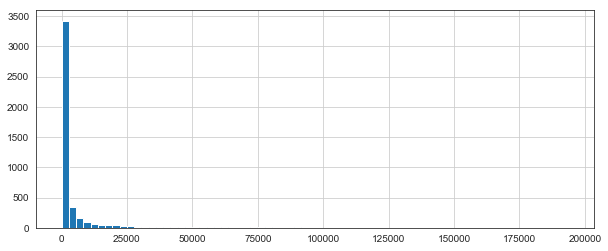

In [195]:
pyp.figure(figsize=(10,4))
ratings['num of ratings'].hist(bins=70)

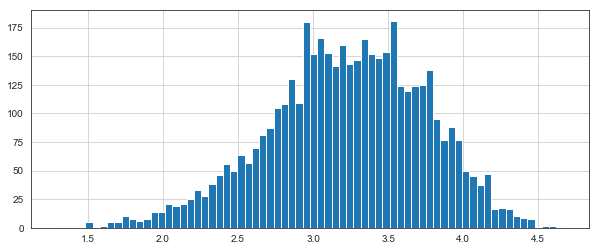

In [196]:
pyp.figure(figsize=(10,4))
ratings['Rating'].hist(bins=70)

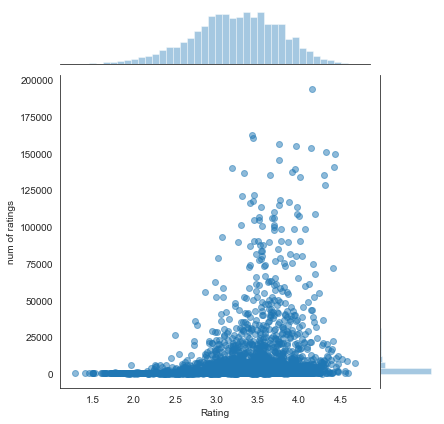

In [197]:
sns.jointplot(x='Rating',y='num of ratings',data=ratings,alpha=0.5)

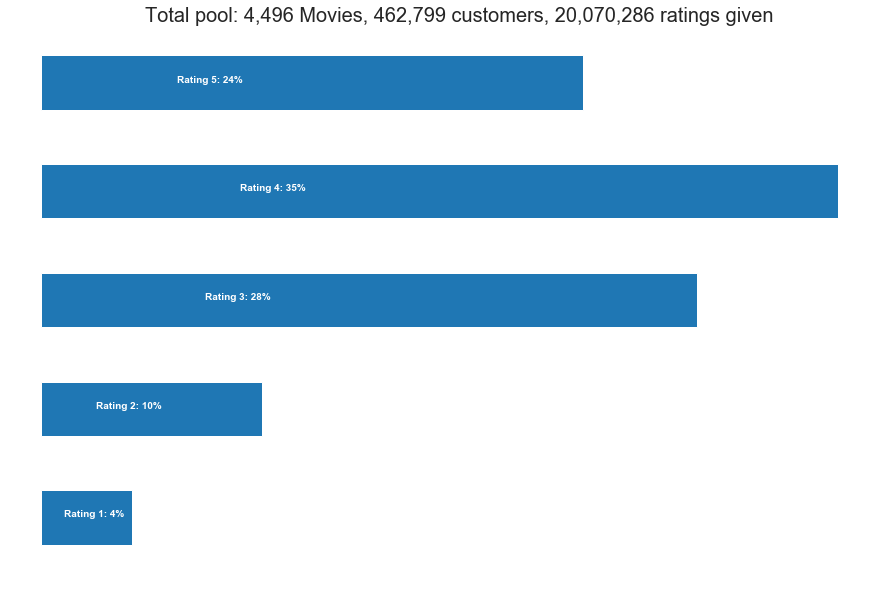

In [198]:
p = df.groupby('Rating')['Rating'].agg(['count'])

# get movie count
movie_count = df.iloc[-1,-1]

# get customer count
cust_count = df['Cust_Id'].nunique() - movie_count

# get rating count
rating_count = df['Cust_Id'].count() - movie_count

ax = p.plot(kind = 'barh', legend = False, figsize = (15,10))
pyp.title('Total pool: {:,} Movies, {:,} customers, {:,} ratings given'.format(movie_count, cust_count, rating_count), fontsize=20)
pyp.axis('off')

for i in range(1,6):
    ax.text(p.iloc[i-1][0]/4, i-1, 'Rating {}: {:.0f}%'.format(i, p.iloc[i-1][0]*100 / p.sum()[0]), color = 'white', weight = 'bold')

In [199]:
#data Slicing

In [210]:
movie_summary = df.groupby('Movie_Id')['Rating'].agg(['count','mean'])
top_movies = movie_summary[movie_summary['count'] <10000].index

In [211]:
top_movies

Int64Index([  44,  152,  156,  166,  167,  216,  378,  385,  580,  599,  621,
             631,  645,  689,  751,  752,  760,  829,  833,  954, 1011, 1060,
            1104, 1163, 1264, 1336, 1502, 1530, 1532, 1543, 1558, 1646, 1665,
            1692, 1743, 1771, 1862, 1971, 2037, 2040, 2057, 2102, 2149, 2161,
            2182, 2319, 2332, 2362, 2379, 2380, 2478, 2482, 2528, 2533, 2548,
            2574, 2595, 2643, 2735, 2876, 2916, 2940, 3013, 3150, 3223, 3224,
            3226, 3232, 3342, 3379, 3441, 3513, 3515, 3523, 3571, 3736, 3835,
            3870, 3923, 3935, 3999, 4012, 4225, 4331, 4380, 4492, 4496],
           dtype='int64', name='Movie_Id')

In [212]:
print('Original Shape: {}'.format(df.shape))
df = df[~df['Movie_Id'].isin(top_movies)]
print('After Trim Shape: {}'.format(df.shape))
print('-Data Examples-')
print(df.iloc[::50000])

Original Shape: (19641243, 3)
After Trim Shape: (18867784, 3)
-Data Examples-
          Cust_Id  Rating  Movie_Id
5106       824097     2.0         8
76919      219033     5.0        28
127444    1953087     3.0        30
177444    1213386     5.0        30
278464    1556692     3.0        58
364177    2515381     3.0       108
421724    2376898     5.0       118
494875    2144343     3.0       143
603577     331811     3.0       175
653577     730053     4.0       175
718274    1909349     5.0       191
768274    1394126     5.0       191
819661    1162869     4.0       197
869661    2457027     3.0       197
919857    2030979     5.0       199
1031333   1885310     4.0       241
1093453   2238663     4.0       252
1167620   2613456     5.0       269
1217621   1891473     3.0       270
1280664   1356095     5.0       285
1336670   1706276     5.0       290
1390718    662270     4.0       299
1440718    420970     3.0       299
1496965   1592086     5.0       311
1546966   2528094     

In [213]:
df.shape

(18867784, 3)

In [214]:
df_title = pd.read_csv(r'C:\Users\Raj\Desktop\NF Dataset\movie_titles.csv', encoding = "ISO-8859-1", header = None, names = ['Movie_Id', 'Year', 'Name'])
df_title.set_index('Movie_Id', inplace = True)
print (df_title.head(10))

            Year                          Name
Movie_Id                                      
1         2003.0               Dinosaur Planet
2         2004.0    Isle of Man TT 2004 Review
3         1997.0                     Character
4         1994.0  Paula Abdul's Get Up & Dance
5         2004.0      The Rise and Fall of ECW
6         1997.0                          Sick
7         1992.0                         8 Man
8         2004.0    What the #$*! Do We Know!?
9         1991.0      Class of Nuke 'Em High 2
10        2001.0                       Fighter


In [215]:
from surprise import Reader,SVD,accuracy,Dataset

In [216]:
from surprise.model_selection import cross_validate,train_test_split

In [221]:
reader = Reader()

data = Dataset.load_from_df(df[['Cust_Id', 'Movie_Id', 'Rating']][:100000], reader)

# sample random trainset and testset
# test set is made of 25% of the ratings.
trainset, testset = train_test_split(data, test_size=.25)

# We'll use the famous SVD algorithm.
algo = SVD()

# Train the algorithm on the trainset, and predict ratings for the testset
algo.fit(trainset)
predictions = algo.test(testset)

# Then compute RMSE
print(accuracy.rmse(predictions))
print(accuracy.mae(predictions))

RMSE: 1.0256
1.0256253577398096
MAE:  0.8284
0.8283606527196282


In [222]:
cross_validate(algo,data, measures=['RMSE', 'MAE'],cv=3,verbose=True)

Evaluating RMSE, MAE of algorithm SVD on 3 split(s).

                  Fold 1  Fold 2  Fold 3  Mean    Std     
RMSE (testset)    1.0287  1.0204  1.0152  1.0214  0.0055  
MAE (testset)     0.8132  0.8134  0.8064  0.8110  0.0033  
Fit time          4.72    4.36    5.70    4.93    0.56    
Test time         0.25    0.49    0.25    0.33    0.11    


{'test_rmse': array([1.02867584, 1.02036891, 1.01523077]),
 'test_mae': array([0.81316844, 0.81344593, 0.80640382]),
 'fit_time': (4.722902059555054, 4.363586902618408, 5.699310779571533),
 'test_time': (0.2525441646575928, 0.48738551139831543, 0.252122163772583)}

In [223]:
trainset_full = data.build_full_trainset()
algo.fit(trainset_full)

# Merging DataFrame and Movies Name using Movie ID as Index

In [224]:
df = pd.merge(df,df_title,on='Movie_Id')
df.head(5)

,Cust_Id,Rating,Movie_Id,Year,Name
0,824097,2.0,8,2004.0,What the #$*! Do We Know!?
1,2630686,5.0,8,2004.0,What the #$*! Do We Know!?
2,644003,3.0,8,2004.0,What the #$*! Do We Know!?
3,785314,1.0,8,2004.0,What the #$*! Do We Know!?
4,243963,3.0,8,2004.0,What the #$*! Do We Know!?


In [225]:
df.head(10)

,Cust_Id,Rating,Movie_Id,Year,Name
0,824097,2.0,8,2004.0,What the #$*! Do We Know!?
1,2630686,5.0,8,2004.0,What the #$*! Do We Know!?
2,644003,3.0,8,2004.0,What the #$*! Do We Know!?
3,785314,1.0,8,2004.0,What the #$*! Do We Know!?
4,243963,3.0,8,2004.0,What the #$*! Do We Know!?
5,229220,4.0,8,2004.0,What the #$*! Do We Know!?
6,1447783,4.0,8,2004.0,What the #$*! Do We Know!?
7,2580478,4.0,8,2004.0,What the #$*! Do We Know!?
8,2599087,3.0,8,2004.0,What the #$*! Do We Know!?
9,2352464,5.0,8,2004.0,What the #$*! Do We Know!?


In [226]:
def user(user_id):
    #Creating watch history of the entered user rated more than 4 
    user_hist = df[(df['Cust_Id'] == user_id) & ((df['Rating'] == 5) | (df['Rating'] == 4 ))]
    user_hist = user_hist.join(df_title['Name'],rsuffix='_right')
    print("Top 3 Watch History \n \n \n",user_hist.head(3),"\n","\n")
    
    
    #creating recommend dataframe
    user_rec = df_title.copy()
    user_rec = user_rec.reset_index()
    user_rec = user_rec[~user_rec['Movie_Id'].isin(top_movies)]
    user_rec['Estimated_Score'] = user_rec['Movie_Id'].apply(lambda x: algo.predict(user_id, x).est)
    user_rec = user_rec.drop('Movie_Id', axis = 1)
    user_rec = user_rec.sort_values('Estimated_Score', ascending=False)
    print("Recommended Movies\n \n",user_rec.iloc[:,[0,2,1]].head(10))

In [227]:
user(2630686)

Top 3 Watch History 
 
 
          Cust_Id  Rating  Movie_Id    Year                           Name  \
1        2630686     5.0         8  2004.0     What the #$*! Do We Know!?   
1036829  2630686     4.0       299  2001.0          Bridget Jones's Diary   
2646748  2630686     5.0       658  1991.0  Robin Hood: Prince of Thieves   

              Name_right  
1        Dinosaur Planet  
1036829              NaN  
2646748              NaN   
 

Recommended Movies
 
          Year  Estimated_Score                           Name
27     2002.0         4.381170                Lilo and Stitch
7      2004.0         4.145337     What the #$*! Do We Know!?
0      2003.0         3.859674                Dinosaur Planet
11880  1993.0         3.859674              For Love or Money
11879  2000.0         3.859674                 Boys Don't Cry
11878  2000.0         3.859674              Seth the Hard Way
11877  2003.0         3.859674  K Street: The Complete Series
11876  1982.0         3.859674     

In [ ]:
df.head()

In [ ]:
user(2473170)

## For user 2173336

In [ ]:
user(2173336)

# Correlation

In [217]:
movie_matrix = pd.pivot_table(df,values='Rating',index='Cust_Id',columns='Movie_Id')

print(movie_matrix.shape)

(465986, 491)


In [ ]:
df

In [218]:
def recommend(movie_title, min_count):
    print("For movie ({})".format(movie_title))
    print("- Top 10 movies recommended based on correlation - ")
    i = int(df_title.index[df_title['Name'] == movie_title][0])
    target =movie_matrix[i]
    similar_to_target = movie_matrix.corrwith(target)
    corr_target = pd.DataFrame(similar_to_target, columns = ['Correlation'])
    corr_target.dropna(inplace = True)
    corr_target = corr_target.sort_values('Correlation', ascending = False)
    corr_target.index = corr_target.index.map(int)
    corr_target = corr_target.join(df_title).join(movie_summary)[['Correlation', 'Name', 'count', 'mean']]
    print(corr_target[corr_target['count']>min_count][:10].to_string(index=False))

In [219]:
recommend("Spartan", 1000)

For movie (Spartan)
- Top 10 movies recommended based on correlation - 
 Correlation                  Name  count      mean
    1.000000               Spartan  19018  3.167315
    0.276561    Cowboy Bebop Remix  10605  3.910891
    0.273098  The Spanish Prisoner  10585  3.604346
    0.268491   Surviving Christmas  20251  3.027406
    0.263951                 Below  11955  3.038394
    0.257037             Ned Kelly  10258  3.168746
    0.249745           A Man Apart  30958  3.379643
    0.249031               Hostage  48617  3.762758
    0.246580     Against the Ropes  15835  3.195895
    0.244077             The Alamo  27667  3.130733


In [220]:
recommend("Hostage",1000)

For movie (Hostage)
- Top 10 movies recommended based on correlation - 
 Correlation                   Name  count      mean
    1.000000                Hostage  48617  3.762758
    0.444109   Domestic Disturbance  24127  3.525055
    0.430027  The Amityville Horror  19867  3.482408
    0.426663           Taking Lives  81260  3.478932
    0.425981         Chain Reaction  15966  3.188150
    0.417729            A Man Apart  30958  3.379643
    0.410270         Blade: Trinity  42727  3.548974
    0.409208                Trapped  18446  3.522498
    0.405285            Exit Wounds  28079  2.999145
    0.405050                   Taxi  32027  3.362475


In [228]:
recommend("What the #$*! Do We Know!?",0)

For movie (What the #$*! Do We Know!?)
- Top 10 movies recommended based on correlation - 
 Correlation                                          Name  count      mean
    1.000000                    What the #$*! Do We Know!?  14910  3.189805
    0.229485                                 Super Size Me  89865  3.863773
    0.222048                          Smallville: Season 1  10082  4.169609
    0.221503                                Love Potion #9  10894  3.202405
    0.217475                    A Love Song for Bobby Long  15915  3.556079
    0.217305                            Music of the Heart  10297  3.608041
    0.213540  Outfoxed: Rupert Murdoch's War on Journalism  11218  3.801836
    0.206379                                      Chocolat  13352  3.938511
    0.203717                                    Rising Sun  19960  3.425401
    0.202846                                  Control Room  15432  3.692392
